In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) # Adjusts the configuration of the plots

In [2]:
# Read in the data

data = pd.read_csv("D:/Catalin/Portofolio/Projects/Python Data Corelation/archive/movies.csv")

In [3]:
# Looking at the data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for missing values

for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print("{} - {}%".format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Dropping rows with missing values for simplicity purposes

data.dropna(how = "any", axis = 0, inplace = True)

In [6]:
# Checking the data types of the columns
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing the data type of "budget" and "gross" columns

data["budget"] = data["budget"].astype("int64")
     
data["gross"] = data["gross"].astype("int64")

In [8]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [9]:
# Extract the correct year and create a new "year_correct" column

data["year_correct"] = data["released"].str.extract(pat = "([0-9]{4})").astype(int)

In [43]:
# Ordering data by "gross" revenue

pd.set_option("display.max_rows", 20) 

data.sort_values(by=["gross"], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [11]:
# Checking the number of duplicate values
count_duplicates = data.duplicated().sum()

count_duplicates # No duplicates found

0

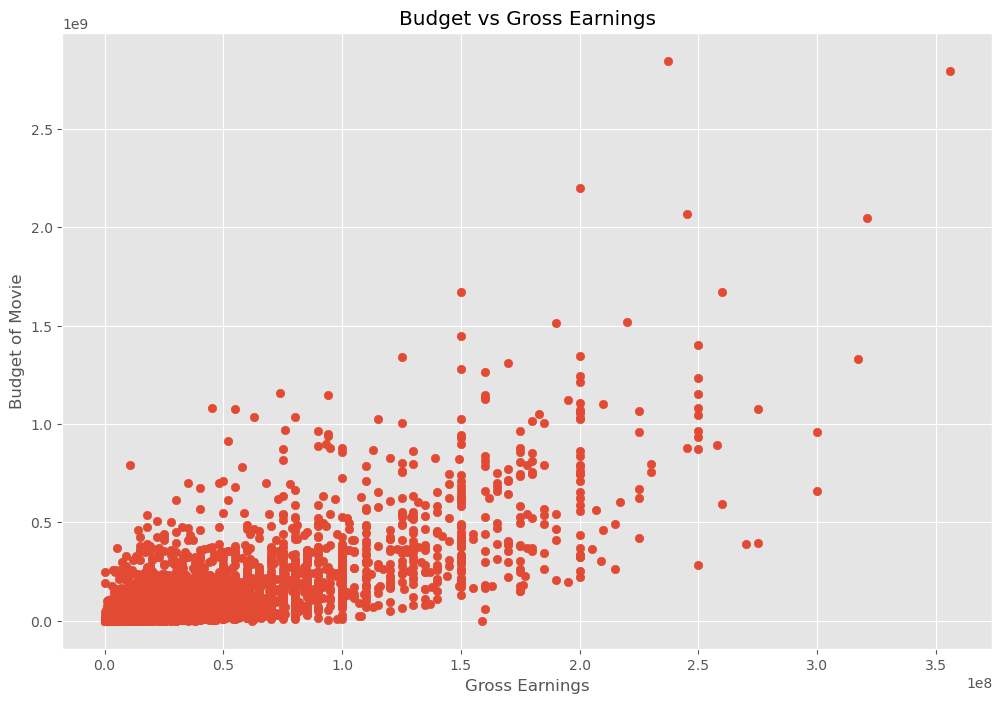

In [12]:
# Scatterplot with budget vs gross revenue

plt.scatter(x = data["budget"], y = data["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget of Movie")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

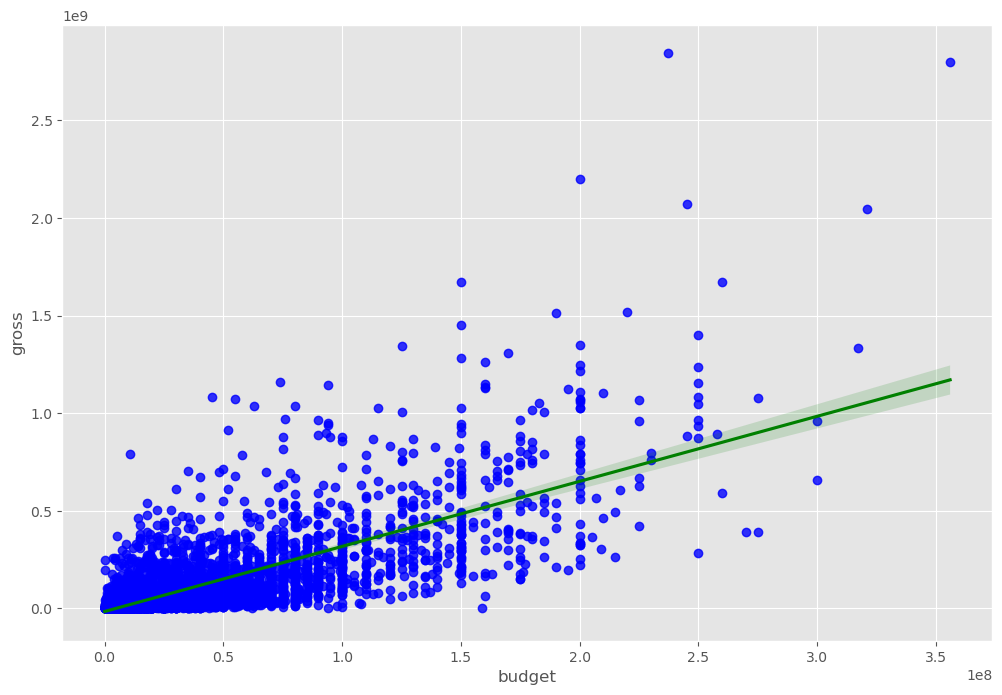

In [13]:
# Plot budget vs gross with regplot

sns.regplot(x = "budget", y = "gross", data = data, scatter_kws = {"color":"blue"}, line_kws = {"color":"green"})

In [14]:
# Inspecting relationships assumptions

# Relationship 1: gross revenue:budget. Both are numerical => Pearson correlation

correlation_matrix = data.corr(method="pearson") 

correlation_matrix # high correlation between budget and gross revenue (0.74)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


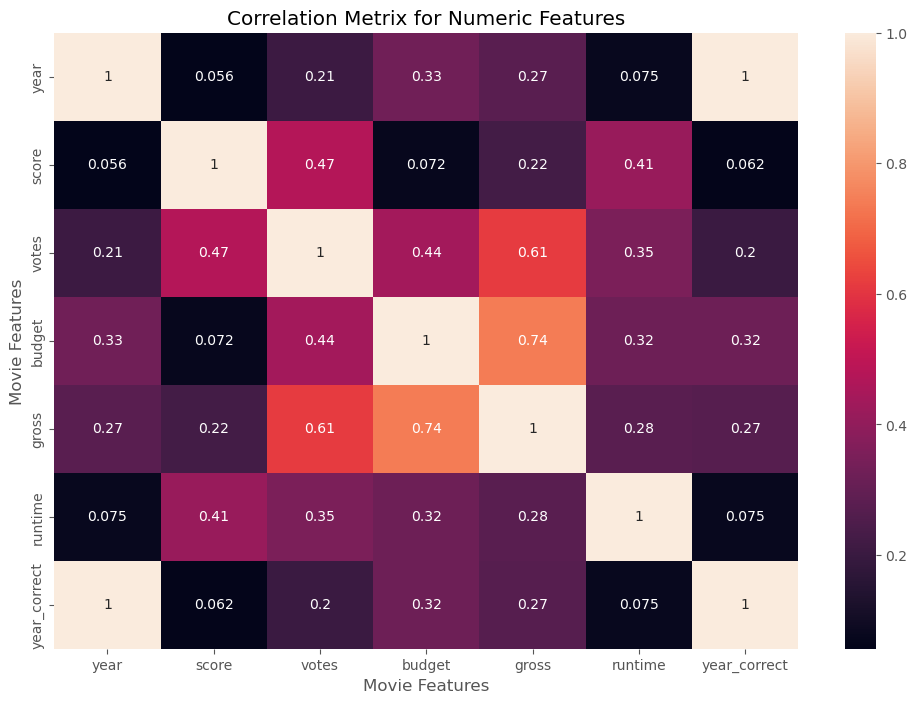

In [15]:
# Plotting the correlation matrix with a heat map

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Metrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

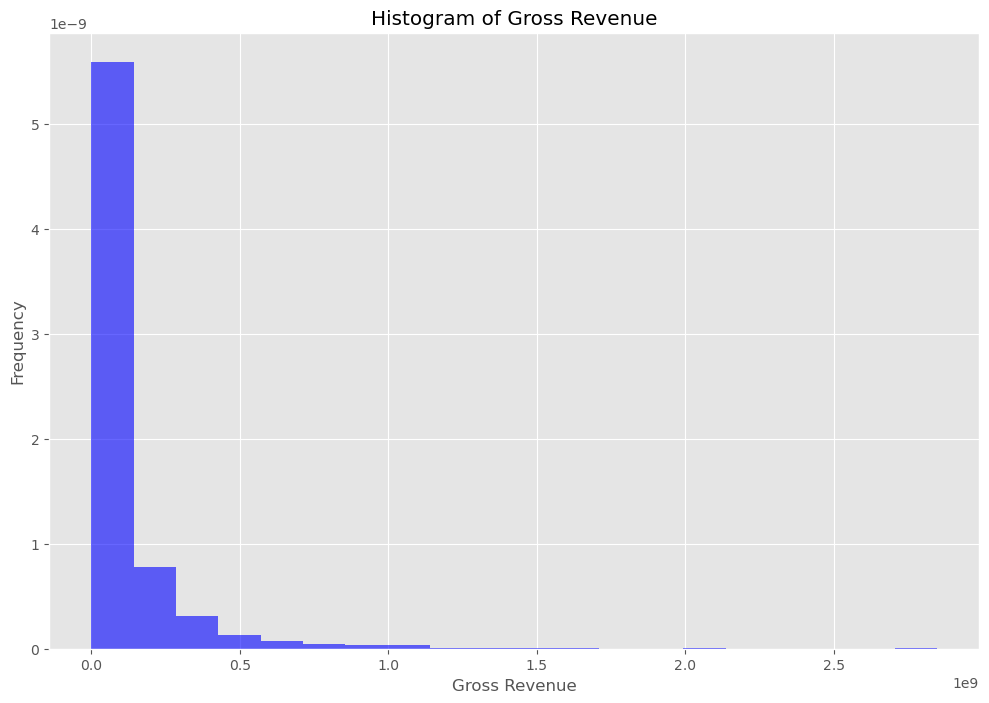

In [16]:
# Relationship 2: gross revenue:company name. KPI numerical, driver categorical with >2 levels => ANOVA

# First inspect for normality assumptions
# Histogram
plt.hist(data['gross'], bins=20, density=True, alpha=0.6, color='b')
plt.title('Histogram of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.show()

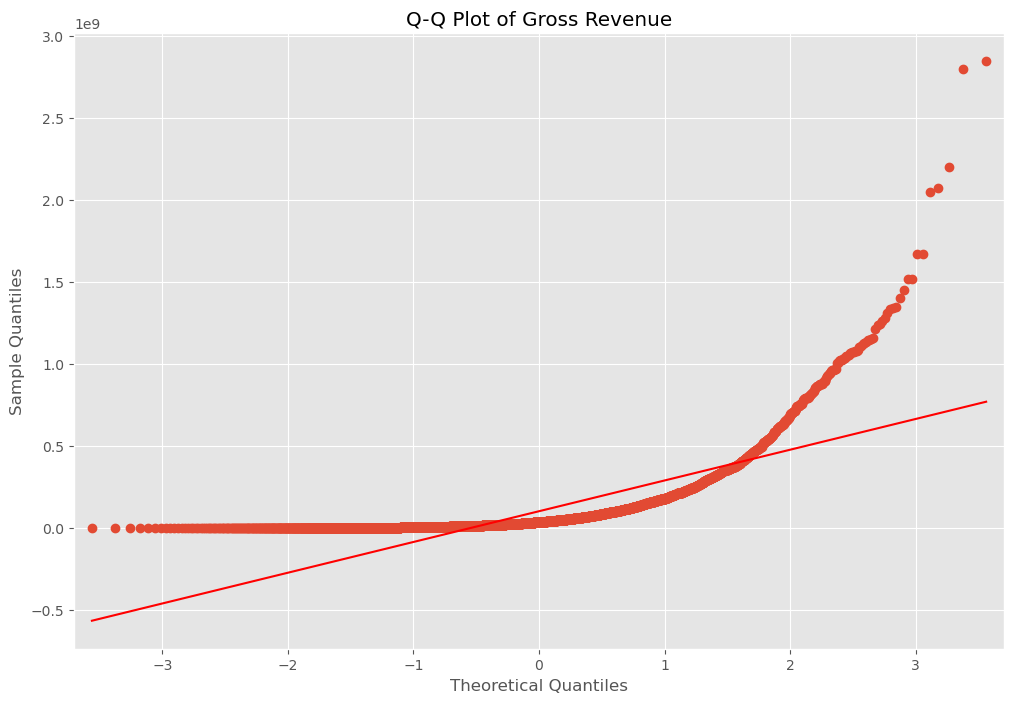

In [17]:
# Q-Q Plot
qqplot(data['gross'], line='s')
plt.title('Q-Q Plot of Gross Revenue')
plt.show()

# Based on histogram and Q-Q plot normality is severely moderated => Kruskal-Wallis test

In [18]:
# Kruskal-Wallis test
# Separate the data into groups based on the 'company' variable
groups = [data[data['company'] == company]['gross'] for company in data['company'].unique()]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

# Check for statistical significance
if p_value < 0.05:  # You can choose your significance level
    print("The Kruskal-Wallis test indicates significant differences among the companies.")
else:
    print("There are no significant differences among the companies according to the Kruskal-Wallis test.")

The Kruskal-Wallis test indicates significant differences among the companies.


In [ ]:
# Perform post-hoc Dunn's test to compare all pairs of companies
posthoc = posthoc_dunn(data, val_col='gross', group_col='company')

# Filter the results to include only rows where the p-value is less than 0.05
significant_comparisons = posthoc[posthoc < 0.05]

# Print only significant differences 
print(significant_comparisons)

In [35]:
# Relationship 3: gross revenue:genre. KPI numerical, driver categorical with >2 levels => Kruskal-Wallis test
# Kruskal-Wallis test
# Separate the data into groups based on the 'genre' variable
groups = [data[data['genre'] == genre]['gross'] for genre in data['genre'].unique()]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

# Check for statistical significance
if p_value < 0.05:  # You can choose your significance level
    print("The Kruskal-Wallis test indicates significant differences among the genres.")
else:
    print("There are no significant differences among the genres according to the Kruskal-Wallis test.")

The Kruskal-Wallis test indicates significant differences among the companies.


In [42]:
# The Kruskal-Wallis test is significant => perform post-hoc pairwise comparisons
unique_genres = data['genre'].unique()
if p_value < 0.05:
    significant_comparisons = []

    # Perform pairwise Mann-Whitney U tests with Bonferroni correction
    for genre1, genre2 in itertools.combinations(unique_genres, 2):
        group1 = data[data['genre'] == genre1]['gross']
        group2 = data[data['genre'] == genre2]['gross']
        
        # Perform Mann-Whitney U test for each pair
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

        # Apply Bonferroni correction for multiple comparisons
        adjusted_alpha = 0.05 / len(list(itertools.combinations(unique_genres, 2)))

        if p_value < adjusted_alpha:
            significant_comparisons.append((genre1, genre2))

    if significant_comparisons:
        print("Significant genre pairs with different revenues:")
        for genre1, genre2 in significant_comparisons:
            print(f"{genre1} vs. {genre2}")

Significant genre pairs with different revenues:
Drama vs. Adventure
Drama vs. Action
Drama vs. Animation
Adventure vs. Action
Adventure vs. Comedy
Adventure vs. Horror
Adventure vs. Biography
Adventure vs. Crime
Adventure vs. Animation
Action vs. Comedy
Action vs. Horror
Action vs. Biography
Action vs. Crime
Action vs. Fantasy
Action vs. Animation
Comedy vs. Crime
Comedy vs. Animation
Horror vs. Animation
Biography vs. Crime
Biography vs. Animation
Crime vs. Animation
Fantasy vs. Animation


In [ ]:
# Gross revenue has high correlation with budget and significant relationships with company and genre.